In [ ]:

In this exercise you will use again the dataset in EFIplus_medit.zip to perform some hypothesis testing
1. Standardize, using z-score, the “Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram.
2. Test whether the means (or medians) of “Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test. Use both standardized and non-standardized values and compare results. Please state which is/are the null hypothesis of your test(s).
3. Test whether there are diferences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).
4. Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?

/var/folders/c0/l2k_tkbs6k70rfw3tnc060fw0000gn/T/ipykernel_2956/2677558530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['temp_ann_z'] = zscore(df_clean['temp_ann'])


Média (z): 0.00, Desvio Padrão: 1.00
95% IC: [-0.03, 0.03]


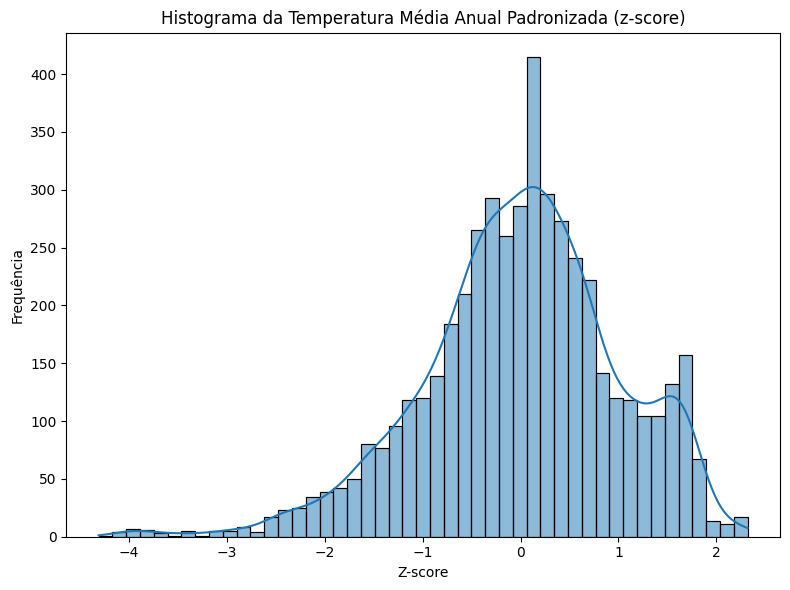

In [2]:
#part 1
from scipy.stats import zscore
import numpy as np

# Remover valores nulos
df_clean = df.dropna(subset=['temp_ann'])

# Padronizar com z-score
df_clean['temp_ann_z'] = zscore(df_clean['temp_ann'])

# Estatísticas
mean_z = df_clean['temp_ann_z'].mean()
std_z = df_clean['temp_ann_z'].std()
n = len(df_clean)
se = std_z / np.sqrt(n)

# IC 95% teórico com z = 1.96
ci_lower = mean_z - 1.96 * se
ci_upper = mean_z + 1.96 * se

print(f"Média (z): {mean_z:.2f}, Desvio Padrão: {std_z:.2f}")
print(f"95% IC: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['temp_ann_z'], kde=True)
plt.title('Histograma da Temperatura Média Anual Padronizada (z-score)')
plt.xlabel('Z-score')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


In [4]:
#part 2:
from scipy.stats import ttest_ind, mannwhitneyu

# Separar grupos
pres = df_clean[df_clean['Salmo trutta fario'] == 1]['temp_ann']
absn = df_clean[df_clean['Salmo trutta fario'] == 0]['temp_ann']

# Teste t (não padronizado)
t_stat, t_p = ttest_ind(pres, absn, equal_var=False)

# Teste Mann-Whitney (não paramétrico)
u_stat, u_p = mannwhitneyu(pres, absn)

print(f"Teste t: p = {t_p:.4f}")
print(f"Mann-Whitney U: p = {u_p:.4f}")

# Repetir com valores padronizados
pres_z = df_clean[df_clean['Salmo trutta fario'] == 1]['temp_ann_z']
absn_z = df_clean[df_clean['Salmo trutta fario'] == 0]['temp_ann_z']

t_stat_z, t_p_z = ttest_ind(pres_z, absn_z, equal_var=False)
u_stat_z, u_p_z = mannwhitneyu(pres_z, absn_z)

print(f"Teste t (z): p = {t_p_z:.4f}")
print(f"Mann-Whitney (z): p = {u_p_z:.4f}")


Teste t: p = 0.0000
Mann-Whitney U: p = 0.0000
Teste t (z): p = 0.0000
Mann-Whitney (z): p = 0.0000


H0 (nula): A média (ou mediana) da temperatura média anual é igual nos locais com e sem Salmo trutta fario.

H1 (alternativa): Existe diferença significativa nas médias (ou medianas).

Existe uma diferença estatisticamente significativa na temperatura média anual entre os locais com presença e ausência de Salmo trutta fario, tanto quando se utiliza a média (teste t) como a mediana (teste Mann-Whitney), e tanto com os valores originais como padronizados.

Esta diferença pode refletir uma preferência térmica da espécie, sendo um dado ecologicamente relevante.

In [5]:
#part 3: 
# Identificar os 8 principais catchments
top8 = df['Catchment_name'].value_counts().nlargest(8).index
df_top8 = df[df['Catchment_name'].isin(top8)].dropna(subset=['Elevation_mean_catch'])

# ANOVA
from scipy.stats import f_oneway
groups = [df_top8[df_top8['Catchment_name'] == c]['Elevation_mean_catch'] for c in top8]
anova_stat, anova_p = f_oneway(*groups)

print(f"ANOVA p-value: {anova_p:.4f}")


ANOVA p-value: 0.0000


H0: A elevação média a montante (Elevation_mean_catch) é igual em todos os 8 catchments.

H1: Pelo menos um dos catchments tem uma elevação média significativamente diferente.

p-valor = 0.0000 → Rejeita-se H₀.

Há diferenças significativas na elevação média entre os catchments.

In [6]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_top8['Elevation_mean_catch'],
                          groups=df_top8['Catchment_name'],
                          alpha=0.05)

print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
  Cantabrica       Catala   50.1883 0.7208  -42.1585  142.5351  False
  Cantabrica        Douro  268.1584    0.0  190.9443  345.3726   True
  Cantabrica         Ebro  467.4299    0.0   399.797  535.0628   True
  Cantabrica Galiza-Norte -184.2794    0.0   -252.02 -116.5388   True
  Cantabrica       Guadia -168.8947    0.0 -251.7428  -86.0466   True
  Cantabrica        Minho  290.9895    0.0  223.2126  358.7663   True
  Cantabrica         Tejo  168.3227    0.0    95.179  241.4664   True
      Catala        Douro  217.9701    0.0  124.2303  311.7099   True
      Catala         Ebro  417.2415    0.0  331.2221  503.2609   True
      Catala Galiza-Norte -234.4677    0.0 -320.5718 -148.3636   True
      Catala       Guadia -219.0831    0.0 -317.5154 -120.6507   True
      Catala        

Existe uma variação significativa da elevação média entre os catchments mais amostrados. A maioria dos pares apresenta diferenças estatisticamente significativas. Com excepção dos seguintes 2 pares: 

Cantabrica vs Catala: p = 0.7208

Douro vs Minho: p = 0.9754